# Univariate Distributions

All the examples in the introduction focused exclusively on the Normal (or Gaussian) Distribution over a single
random variable, but lots of other univariate distributions exist.

The **Copulas** library supports several of them through the `Univariate` subclasses defined within the
`copulas.univariate` package:

* `copulas.univariate.BetaUnivariate`: Implements a Beta distribution.
* `copulas.univariate.GammaUnivariate`: Implements a Gamma distribution.
* `copulas.univariate.GaussianKDE`: Implements a Kernel-Density Estimate using a Gaussian kernel.
* `copulas.univariate.GaussianUnivariate`: Implements a Gaussian (or Normal) distribution.
* `copulas.univariate.TruncatedGaussian`: Implements a Truncated Gaussian distribution.

Let's explore an example of how to use a `Univariate` subclass.

## Univariate Usage Example

In this example we will be focusing on the `BetaUnivariate` class, which implements a [Beta Distribution](https://en.wikipedia.org/wiki/Beta_distribution).

This distribution is parameterized by two positive shape parameters, $α$ and $β$, which in our implementation are called $a$ and $b$.

Additionally, our implementation also uses the same `loc` and `scale` arguments as the underlying `scipy.stats.beta` model that we are using.

For this example, we will be using a simulated dataset that follows the beta distribution with parameters $a = 3$, $b = 1$, $loc = 4$ and $scale = 1$.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from copulas.datasets import sample_univariate_beta

data = sample_univariate_beta()

In [3]:
data.head()

0    4.796025
1    4.935189
2    4.637677
3    4.945320
4    4.726815
dtype: float64

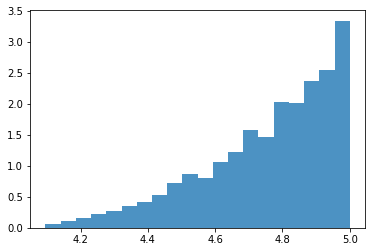

In [4]:
from copulas.visualization import hist_1d

hist_1d(data)

### Fitting the model

The first step to use our `BetaUnivariate` model is to fit it to the data by passing the `data` to
its `fit` method.

In [5]:
from copulas.univariate import BetaUnivariate

beta = BetaUnivariate()
beta.fit(data)

After the model has been fitted, we can observe the parameters that it has aproximated from the data.

In [6]:
beta._params

{'loc': 4.095558923695414,
 'scale': 0.9044258869808379,
 'a': 2.552323190906777,
 'b': 0.9041091899047261}

### Sampling new data

Once the model is fitted, we can generate new data that follows a similar distribution.

To do this, we can call the `sample` method of our `beta` object, passing the number
of samples that we want to generate.

In [7]:
sampled = beta.sample(1000)

We can compare the distribution of the real data to the sampled one by plotting both
histograms together.

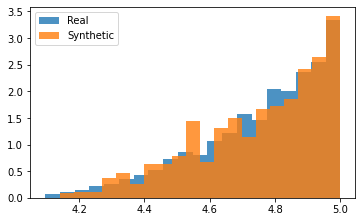

In [8]:
from copulas.visualization import compare_1d

compare_1d(data, sampled)

### Probability Density

The probability density of a Beta distribution is defined by

\begin{equation}
\frac{x^{\alpha -1}(1-x)^{\beta -1}}
     {B(\alpha ,\beta)}
\end{equation}

where $B(\alpha,\beta)$ is the Beta function defined as

\begin{equation}
B(\alpha, \beta) = \frac{\Gamma (\alpha )\Gamma (\beta )}
                        {\Gamma (\alpha +\beta )}
\end{equation}

and $\Gamma$ is the Gamma function.

The probability density can be computed for an array of data points using the `probability_density` method.

In [9]:
probability_density = beta.pdf(sampled)

In [10]:
probability_density[0:5]

array([3.96772858, 1.67572128, 1.90369638, 3.51125542, 0.71732109])

If we plot the probability densities sorted by the sampled values we will get a better notion
of their behavior.

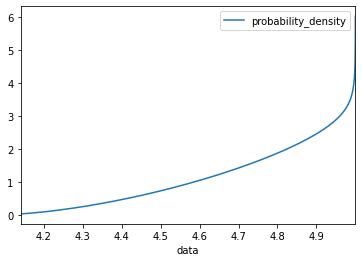

In [11]:
import pandas as pd

pd.DataFrame({
    'data': sampled,
    'probability_density': probability_density
}).sort_values('data').set_index('data').plot()

### Cumulative Distribution

The cumulative distribution of Beta distribution is defined by:

\begin{equation}
p = F(x, a, b) = \frac{1}{B(a, b)}\int_{0}^{x}t^{a - 1}{(1 - t)}^{b - 1}dt
\end{equation}

where $B(\alpha,\beta)$ is the Beta function defined above.

The cumulative distribution can be computed for an array of data points using the
`cumulative_distribution` method.

In [12]:
cumulative_distribution = beta.cumulative_distribution(sampled)

In [13]:
cumulative_distribution[0:5]

array([0.98185868, 0.4148939 , 0.49927947, 0.95037356, 0.11102835])

Like with probability densities, if we plot the cumulative distribution values
sorted by the input data, we will get a better notion of how it behaves

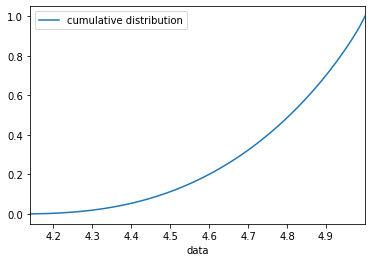

In [14]:
pd.DataFrame({
    'data': sampled,
    'cumulative distribution': cumulative_distribution
}).sort_values('data').set_index('data').plot()

### to_dict and from_dict

All the `Univariate` classes implement a `to_dict` method that allows obtaining
all the parameters that define the distribution in a python dictionary.

In [15]:
parameters = beta.to_dict()

In [16]:
parameters

{'loc': 4.095558923695414,
 'scale': 0.9044258869808379,
 'a': 2.552323190906777,
 'b': 0.9041091899047261,
 'type': 'copulas.univariate.beta.BetaUnivariate'}

This `parameters` dictionary can be later on passed to the `Univariate.from_dict` class method,
which will create an instance of our model with the same parameters as before.

In [17]:
from copulas.univariate import Univariate

new_beta = Univariate.from_dict(parameters)

We can sample some more data again to see how it still behaves as expected.

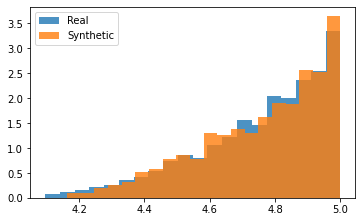

In [18]:
new_sampled = new_beta.sample(1000)

compare_1d(data, new_sampled)

## Selecting the best Univariate

A part from the specific `Univariate` subclasses, **Copulas** allows you to use the `Univariate` parent
class as a generic distribution.

### Fitting a generic Univariate

When this class is used directly and fitted to the data, it will automatically search for the `Univariate`
subclass that better fits to the data.

Let's see what happens when we fit it to the data that we were using above.

In [19]:
from copulas.univariate import Univariate

univariate = Univariate()
univariate.fit(data)

In order to see which subclass has been chosen and with which parameters,
we can call the `to_dict` method.

In [20]:
parameters = univariate.to_dict()

In [21]:
parameters

{'loc': 4.095558923695414,
 'scale': 0.9044258869808379,
 'a': 2.552323190906777,
 'b': 0.9041091899047261,
 'type': 'copulas.univariate.beta.BetaUnivariate'}

We can observe here how the `Univariate` class automatically selected the `BetaUnivariate`
as the best distribution for our data, and how it learned the same parameters as before.

Let's go a bit further and see what happens when we fit `Univariate` instances on data
with different distributions:

In [22]:
from copulas.datasets import sample_univariates

data = sample_univariates()

In [23]:
data.head()

bernoulli    bimodal   uniform    normal  degenerate  exponential      beta
0        0.0  11.399355  0.498160  1.496714     0.37454     3.469268  4.796025
1        0.0  10.924634  2.802857  0.861736     0.37454     6.010121  4.935189
2        0.0  10.059630  1.927976  1.647689     0.37454     4.316746  4.637677
3        0.0   9.353063  1.394634  2.523030     0.37454     3.912943  4.945320
4        1.0  -0.234153 -0.375925  0.765847     0.37454     3.169625  4.726815

In [24]:
synth_data = pd.DataFrame()
distributions = []

for column in data.columns:
    real_data = data[column]
    univariate = Univariate()
    univariate.fit(real_data)
    synth_data[column] = univariate.sample(len(real_data))
    distributions.append(univariate.to_dict()['type'])

In [25]:
synth_data.head()

bernoulli    bimodal   uniform    normal  degenerate  exponential      beta
0   0.126054   1.950079  0.833157  1.154327     0.37454     3.014643  4.990397
1  -0.216558  13.461737  2.131687 -0.031510     0.37454     3.205208  4.781987
2   0.158551   1.011978  0.274088  1.563969     0.37454     4.097697  4.982117
3   0.151797   9.476947  0.527291  0.698796     0.37454     3.031567  4.809642
4   1.023261   0.982005  1.266706  0.890644     0.37454     5.713887  4.724303

In [26]:
distributions

['copulas.univariate.gaussian_kde.GaussianKDE',
 'copulas.univariate.gaussian_kde.GaussianKDE',
 'copulas.univariate.beta.BetaUnivariate',
 'copulas.univariate.gaussian_kde.GaussianKDE',
 'copulas.univariate.beta.BetaUnivariate',
 'copulas.univariate.gamma.GammaUnivariate',
 'copulas.univariate.beta.BetaUnivariate']

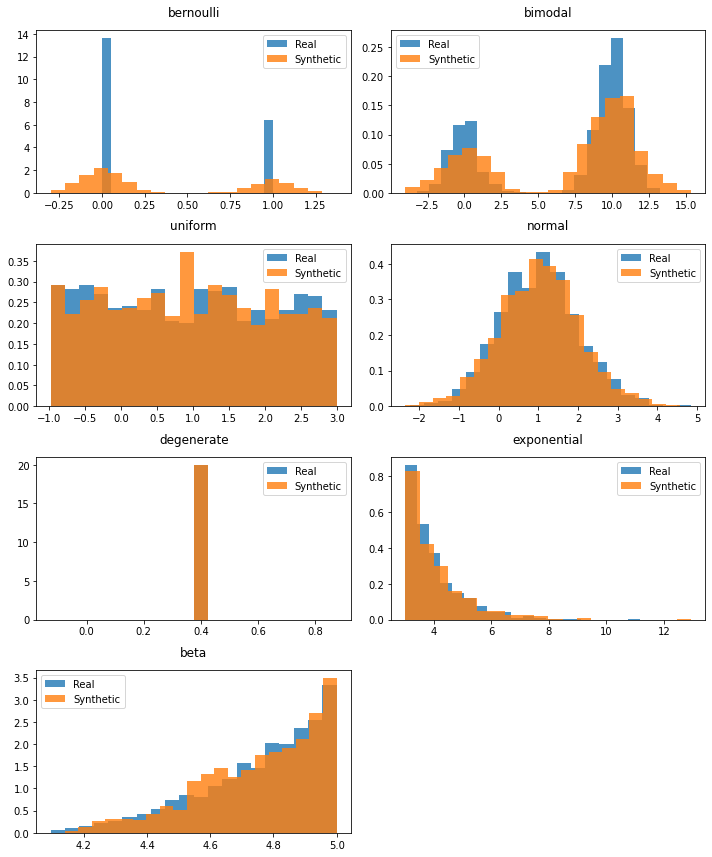

In [27]:
compare_1d(data, synth_data)

### Recreating the Univariate

As we learned before, the `Univariate.from_dict` class method can be used to recreate our model.

In [28]:
univariate = Univariate()
univariate.fit(data['beta'])
new_model = Univariate.from_dict(parameters)

Notice, though, how in this case the model will not be an instance of the class `Univariate` anymore,
but rather an instance of the corresponding subclass, `BetaUnivariate`.

In [29]:
new_model.__class__

copulas.univariate.beta.BetaUnivariate

### Univariate Families

In some cases, we might want to add some constraints in order to restrict the search to only
some `Univariate` distributions.

This can be achieved by creating and passing a list of candidate subclasses to our `Univariate` class.

For example, let's restrict the search over the `bimodal` column of our dataset restricting the
search to only the `BetaUnivariate`, the `GaussianUnivariate` and the `GammaUnivariate`.

In [30]:
from copulas.univariate import GaussianUnivariate, GammaUnivariate

candidates = [BetaUnivariate, GaussianUnivariate, GammaUnivariate]

univariate = Univariate(candidates=candidates)
univariate.fit(data['bimodal'])

univariate.to_dict()

{'loc': 6.830066099361434,
 'scale': 4.811082463652564,
 'type': 'copulas.univariate.gaussian.GaussianUnivariate'}

However, the **Copulas** `Univariate` subclasses are organized in families to make the
application of these constraints to the search easier.

The `Univariate` families are organized in ways:

* PARAMETRIC: Distributions can be either non parametric or parametric.
* BOUNDED: Distributions can be either unbounded, semi-bounded or bounded.

We can see these properties by examining the corresponding attributes of each `Univariate` subclass.

In [31]:
from copulas.univariate import GaussianKDE, TruncatedGaussian

univariates = [
    BetaUnivariate,
    GammaUnivariate,
    GaussianKDE,
    GaussianUnivariate,
    TruncatedGaussian
]

pd.DataFrame([
    [uni.__name__, uni.PARAMETRIC, uni.BOUNDED]
    for uni in univariates
], columns=['Distribution', 'Parametric', 'Bounded'])

Distribution                     Parametric                   Bounded
0      BetaUnivariate      ParametricType.PARAMETRIC       BoundedType.BOUNDED
1     GammaUnivariate      ParametricType.PARAMETRIC  BoundedType.SEMI_BOUNDED
2         GaussianKDE  ParametricType.NON_PARAMETRIC     BoundedType.UNBOUNDED
3  GaussianUnivariate      ParametricType.PARAMETRIC     BoundedType.UNBOUNDED
4   TruncatedGaussian      ParametricType.PARAMETRIC       BoundedType.BOUNDED

When searching for the best distribution, instead of building and passing the list
of candidates by hand, we can simply pass the `parametric` or `bounded` value
that we want use.

For example, let's search again for the best distribution over the `bimodal` column of
our dataset, but restricting the search to only `PARAMETRIC` and `BOUNDED` distributions.

In [32]:
from copulas.univariate import ParametricType, BoundedType

univariate = Univariate(
    parametric=ParametricType.PARAMETRIC,
    bounded=BoundedType.BOUNDED
)
univariate.fit(data['bimodal'])

univariate.to_dict()

{'a': -1.5932065697344446,
 'b': 1.2398855571316814e-14,
 'loc': 13.193107687054022,
 'scale': 10.315282059796969,
 'type': 'copulas.univariate.truncated_gaussian.TruncatedGaussian'}